# Capstone Inference Project

Import Libraries
Need Seaborn, matplotlib to plot the data. Numpy and pandas for data manipulations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns

In [3]:
df = pd.read_csv('C:\Harinee\Projects\Capstone inference\Data\creditcard.csv')
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Good transactions
df0 = df[df['Class'] == 0]
df0.shape

(284315, 31)

In [6]:
#Fraud Transactions
df1 = df[df['Class'] == 1]
df1.shape

(492, 31)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


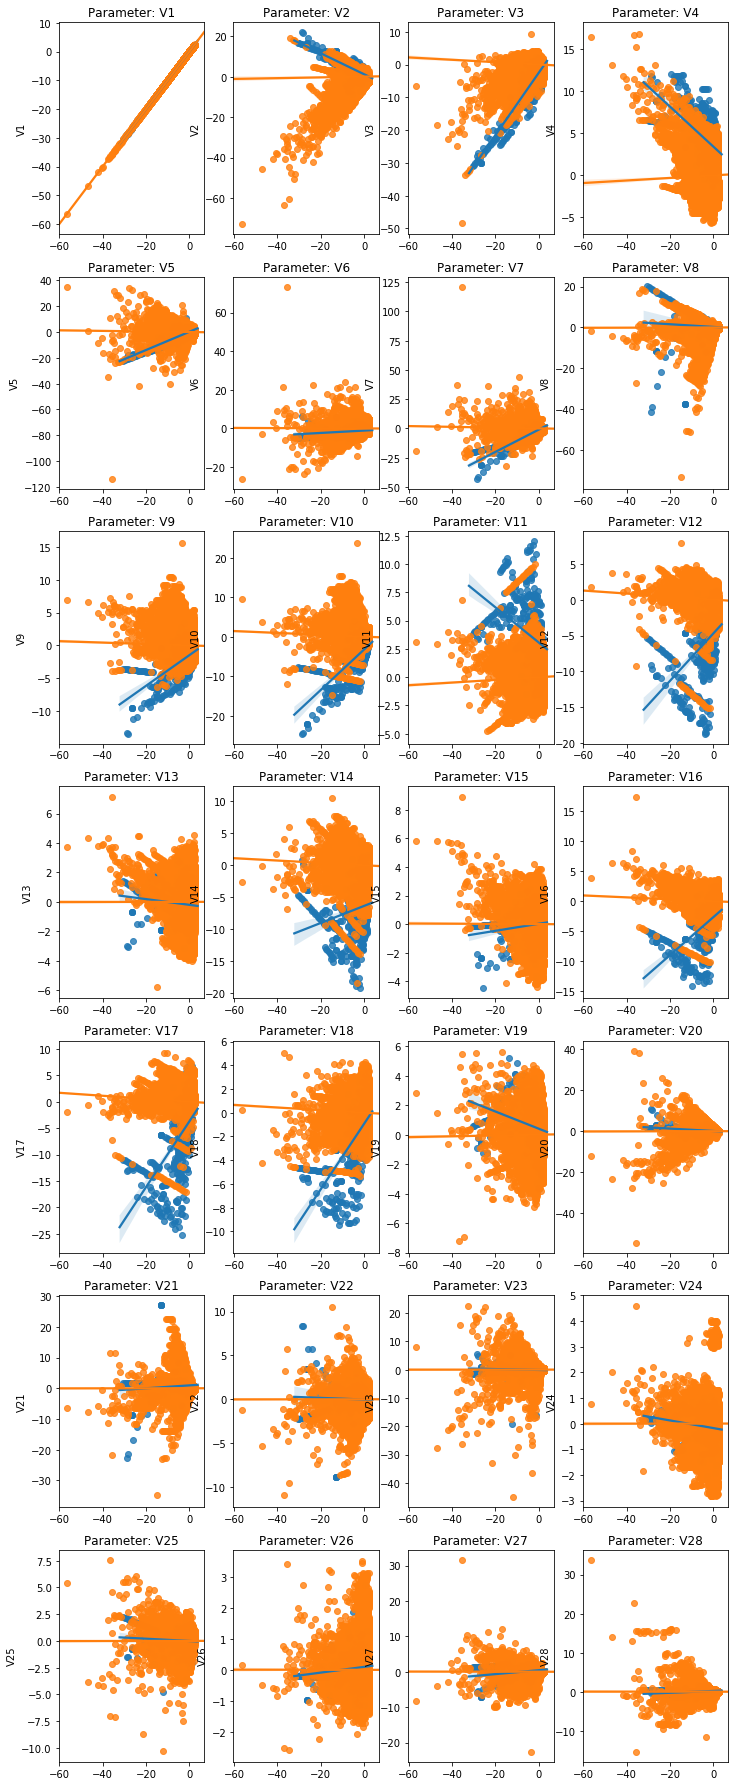

In [7]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df[df.iloc[:,1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.regplot(x=df1["V1"], y=df1[cn])
    sns.regplot(x=df0["V1"], y=df0[cn])
    ax.set_xlabel('')
    ax.set_title('Parameter: ' + str(cn))
plt.show()

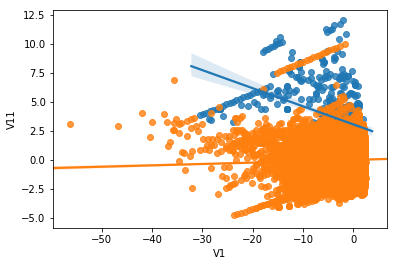

In [12]:
sns.regplot(x=df1["V1"], y=df1["V11"])
sns.regplot(x=df0["V1"], y=df0["V11"])
#there seems to be a linear relationship between v1 and v11 for fradulent transactions.

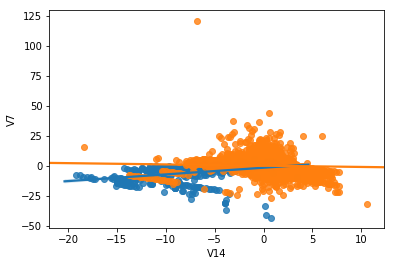

In [172]:
sns.regplot(x=df1["V14"], y=df1["V7"])
sns.regplot(x=df0["V14"], y=df0["V7"])

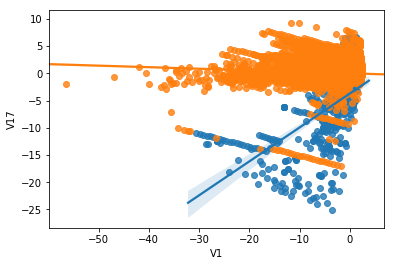

In [173]:
sns.regplot(x=df1["V1"], y=df1["V17"])
sns.regplot(x=df0["V1"], y=df0["V17"])

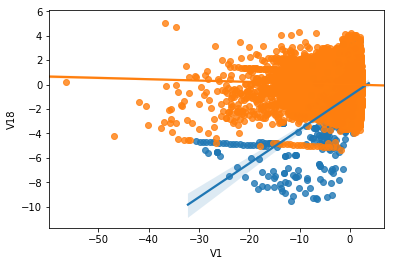

In [14]:
sns.regplot(x=df1["V1"], y=df1["V18"])
sns.regplot(x=df0["V1"], y=df0["V18"])

Are there variables that are particularly significant in terms of explaining the answer to your project question? 

yes. To find the variables which has an effect on answering the question, tried to compute the overlap area between the two distributions. 

In [26]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

In [113]:
def overlapArea(aVar):
    m1 = df0[aVar].mean()
    std1 = df0[aVar].std()
    m2 = df1[aVar].mean()
    std2 = df1[aVar].std()
    #print ([m1,m2,std1,std2])
    result2 = solve(m1,m2,std1,std2)
    result4 = np.sort(np.concatenate((result2, result2)))
    #print(result3)
    x = np.linspace(-25,9,10000)
    plt.xlabel('V1')
    plot1=plt.plot(x,mlab.normpdf(x,m1,std1), 'g', label='df0')
    plot2=plt.plot(x,mlab.normpdf(x,m2,std2), 'r', label='df1')
    #plot3=plt.plot(result2,mlab.normpdf(result2,m1,std1),'r')
    points = norm.cdf((result4 - [m1,m2, m1, m2]) / [std1, std2, std1, std2])
    #print (points)
    #print (points[0:2])
    #print (points[2:4])
    #print (1 - points[2:4])
    #print ((points[2:4]) - (points[0:2]))
    #print ("----")
    #print (np.amin(points[0:2]))
    #print (np.amin(1 - points[2:4]))
    #print (aVar, ": ", np.amin((points[2:4]) - (points[0:2])))
    out = np.amin(points[0:2]) + np.amin(1 - points[2:4]) + np.amin((points[2:4]) - (points[0:2]))
    print (aVar, ":", out)
    return(out)

V1 :  0.30268931873690663
V2 :  0.3336985924480875
V3 :  0.200949893848689
V4 :  0.19338805499215356
V5 :  0.2957682807210663
V6 :  0.43577727788832044
V7 :  0.19704344977423816
V8 :  0.25486246567003346
V9 :  0.3124508307192303
V10 :  0.17910080981308718
V11 :  0.20142039215684618
V12 :  0.1437510835440574
V13 :  0.6469902564234236
V14 :  0.10490516773288516
V15 :  0.6436914690123909
V16 :  0.1969359507190248
V17 :  0.12514860856753252
V18 :  0.29105362693530856
V19 :  0.48054828449734566
V20 :  0.5231718934127874
V21 :  0.26739283314120527
V22 :  0.4948856168127509
V23 :  0.4410625614771777
V24 :  0.6232794753195394
V25 :  0.5734023361416108
V26 :  0.5556227814809808
V27 :  0.3648672039305976
V28 :  0.5485298078530836


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\Program

0.7528768376695709

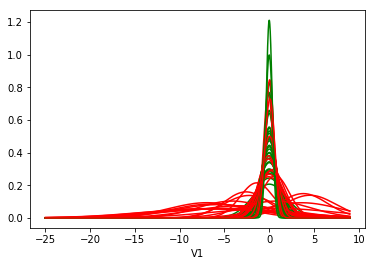

In [131]:
overlapArea("V1")
overlapArea("V2")
overlapArea("V3")
overlapArea("V4")
overlapArea("V5")
overlapArea("V6")
overlapArea("V7")
overlapArea("V8")
overlapArea("V9")
overlapArea("V10")
overlapArea("V11")
overlapArea("V12")
overlapArea("V13")
overlapArea("V14")
overlapArea("V15")
overlapArea("V16")
overlapArea("V17")
overlapArea("V18")
overlapArea("V19")
overlapArea("V20")
overlapArea("V21")
overlapArea("V22")
overlapArea("V23")
overlapArea("V24")
overlapArea("V25")
overlapArea("V26")
overlapArea("V27")
overlapArea("V28")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


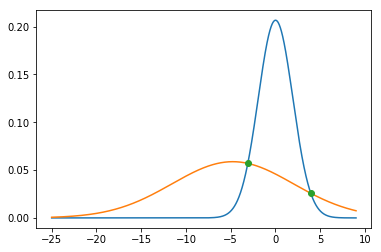

In [51]:
x = np.linspace(-25,9,10000)
plot1=plt.plot(x,mlab.normpdf(x,m1,std1))
plot2=plt.plot(x,mlab.normpdf(x,m2,std2))
plot3=plt.plot(result2,mlab.normpdf(result2,m1,std1),'o')

V14 :  0.10490516773288516


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


0.12377162096585732

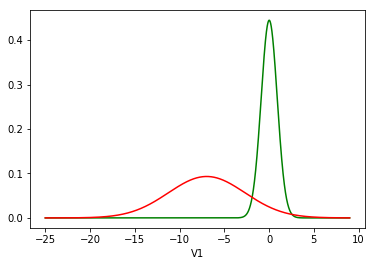

In [177]:
overlapArea("V14")

V17 :  0.12514860856753252


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


0.14536279225361626

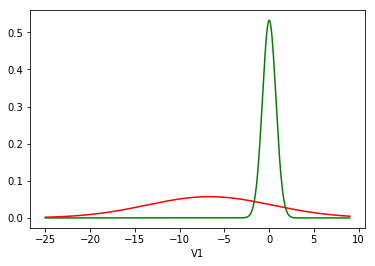

In [179]:
overlapArea("V17")

When the value of the overlap area between the two distributions (fradulent[df(0)] and Non fradulent[df(1))] is smaller then the quetsion of the project - predicting fradulent or non fradulent credit card card transaction is feasible. from the above analysis it can be concluded that variable V14 has a overlap of 0.104905168 and also V17 has a overlap of 0.125148609, These are the minimum overlaps, adn hence thest two variables can have singnificant influence in explaining the answer to the topic. Whereas the variables V15 and V13 have values 0.643691469 and 0.646990256 and it does not segergate the data and the distribution is almost same and hence will not be too much effective to find the fradulent/non-fradulent tranactions. 


V15 :  0.6436914690123909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


0.9258590710244294

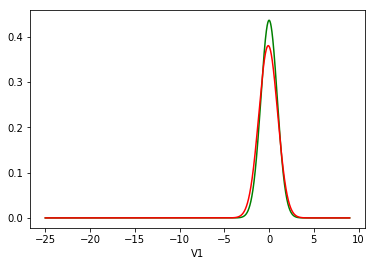

In [175]:
overlapArea("V15")

V13 :  0.6469902564234236


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


0.9374809190756068

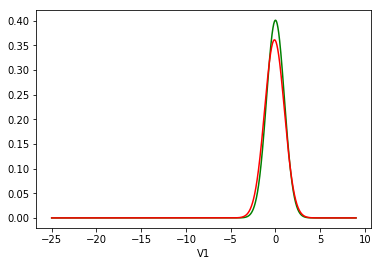

In [176]:
overlapArea("V13")

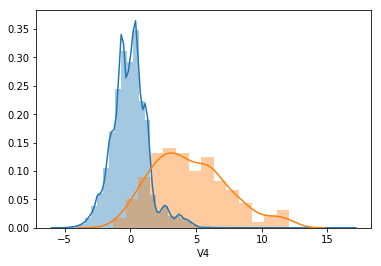

In [10]:
sns.distplot(a=df0["V4"], kde="True")
sns.distplot(a=df1["V4"], kde="True")

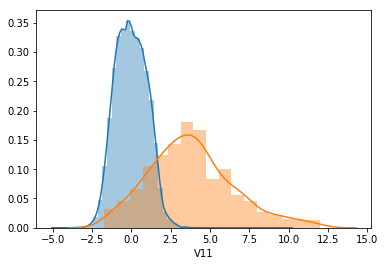

In [15]:
sns.distplot(a=df0["V11"], kde="True")
sns.distplot(a=df1["V11"], kde="True")

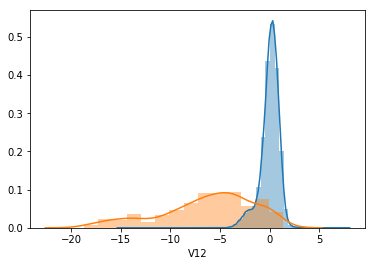

In [16]:
sns.distplot(a=df0["V12"], kde="True")
sns.distplot(a=df1["V12"], kde="True")

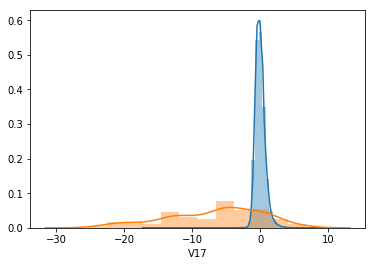

In [17]:
sns.distplot(a=df0["V17"], kde="True")
sns.distplot(a=df1["V17"], kde="True")

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

yes. to find the correlation between varaiables the correlation matrix is calclulated and the intial one used all varaibles and the second one used variable V1 to V28 excluding Time, Amount and class.

In [137]:
#Creating correlation matrix
df0.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.116489,-0.008408,-0.441001,-0.104329,0.172963,-0.064131,8.417234e-02,-0.035954,-0.010577,...,0.047081,0.144257,0.051167,-0.016259,-0.233290,-4.135318e-02,-0.003859,-0.009442,-0.010634,NaN
V1,0.116489,1.000000,0.022537,-0.047511,0.020927,-0.031465,-0.006405,-5.356252e-02,0.004444,-0.018962,...,0.001542,0.000627,0.000720,0.000269,0.001181,-3.337293e-04,-0.003843,-0.001883,-0.231250,NaN
V2,-0.008408,0.022537,1.000000,0.037855,-0.018318,0.023772,0.004879,4.203396e-02,-0.000308,0.016215,...,-0.003208,0.000054,-0.002049,0.000359,-0.001272,-1.713001e-04,0.002333,-0.000455,-0.536546,NaN
V3,-0.441001,-0.047511,0.037855,1.000000,0.039621,-0.048840,-0.013294,-8.485279e-02,0.012717,-0.033957,...,0.002536,0.001591,0.000592,-0.000909,0.001990,6.214473e-04,-0.002033,-0.001536,-0.219130,NaN
V4,-0.104329,0.020927,-0.018318,0.039621,1.000000,0.020792,0.007452,4.128382e-02,-0.004830,0.019998,...,-0.002162,-0.001545,-0.000146,0.001056,0.000022,-1.424070e-03,-0.001003,0.000076,0.099802,NaN
V5,0.172963,-0.031465,0.023772,-0.048840,0.020792,1.000000,-0.006130,-5.411916e-02,0.010285,-0.019872,...,0.000190,0.001672,0.001603,0.000992,0.001354,-4.320713e-04,-0.004159,-0.001932,-0.392782,NaN
V6,-0.064131,-0.006405,0.004879,-0.013294,0.007452,-0.006130,1.000000,-1.083798e-02,0.011390,-0.005735,...,0.000552,0.000013,-0.002824,-0.000057,0.000848,2.721747e-04,0.002261,0.000420,0.216433,NaN
V7,0.084172,-0.053563,0.042034,-0.084853,0.041284,-0.054119,-0.010838,1.000000e+00,-0.004257,-0.037696,...,0.001388,0.003348,0.002671,-0.000012,-0.000794,-5.954775e-07,-0.008393,-0.002432,0.416628,NaN
V8,-0.035954,0.004444,-0.000308,0.012717,-0.004830,0.010285,0.011390,-4.257049e-03,1.000000,0.003386,...,0.005968,-0.000810,0.011596,-0.000932,-0.004385,-7.163256e-04,-0.010754,0.000151,-0.106694,NaN
V9,-0.010577,-0.018962,0.016215,-0.033957,0.019998,-0.019872,-0.005735,-3.769580e-02,0.003386,1.000000,...,-0.002533,0.002909,0.000623,-0.000449,0.000250,1.126413e-03,-0.001473,-0.000871,-0.044684,NaN


In [165]:
c = df0.corr().abs()
s = c.unstack().dropna()
s = s[ s != 1]
so = s.sort_values(kind="quicksort")
print(so.tail(10))

V20     Amount    0.340429
Amount  V20       0.340429
V5      Amount    0.392782
Amount  V5        0.392782
        V7        0.416628
V7      Amount    0.416628
Time    V3        0.441001
V3      Time      0.441001
Amount  V2        0.536546
V2      Amount    0.536546
dtype: float64


In [171]:
c1 =df0[["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10","V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"]].corr()
s1 = c1.unstack().dropna().abs()
s1 = s1[ s1 != 1]
so1 = s1.sort_values(kind="quicksort")
print(so1.tail(40))

V14  V7     0.080338
V7   V14    0.080338
V17  V5     0.081834
V5   V17    0.081834
V3   V12    0.082218
V12  V3     0.082218
V3   V14    0.082701
V14  V3     0.082701
V7   V3     0.084853
V3   V7     0.084853
V7   V10    0.087096
V10  V7     0.087096
V12  V7     0.087163
V7   V12    0.087163
V17  V11    0.088546
V11  V17    0.088546
V12  V16    0.090493
V16  V12    0.090493
V14  V16    0.090809
V16  V14    0.090809
V12  V10    0.095612
V10  V12    0.095612
V14  V10    0.095809
V10  V14    0.095809
V18  V17    0.096829
V17  V18    0.096829
V14  V12    0.121573
V12  V14    0.121573
V17  V3     0.123916
V3   V17    0.123916
V7   V17    0.141877
V17  V7     0.141877
V10  V17    0.144321
V17  V10    0.144321
V16  V17    0.146119
V17  V16    0.146119
     V14    0.164957
V14  V17    0.164957
V12  V17    0.168632
V17  V12    0.168632
dtype: float64


the max correlation value is  which is significantly lower and implies that none of the variables are highly correlated.
Whereas the correlation between amount and V2 ,V3,  V5 , V20 have values  0.536546,0.441001, 0.392782, 0.340429 which can be concluded as the amount increases /decreases has higher effect on these variables. So V2, V3, V5 and V20 could act as proxies for amount,